# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **No-show appointments**: This dataset collects information from nearly 100,000 medical appointments in Brazil, and focuses on whether or not patients showed up on their appointments.
A number of patient characteristics are included in each class (Gender - Age - Scholarships - Hypertension - Diabetes - Alcoholism - Handcap - SMS Received).

> **Research Questiones**:-
<li><a href="#1">Research Question 1 : Does 'Gender' affect attendance?</a></li>
<li><a href="#2">Research Question 2 : Does 'Scholarship' affect attendance?</a></li>
<li><a href="#3">Research Question 3 : Does 'Hipertension' affect attendance?</a></li>
<li><a href="#4">Research Question 4 : Does 'Diabetes' affect attendance?</a></li>
<li><a href="#5">Research Question 5 : Does 'Alcoholism' affect attendance?</a></li>
<li><a href="#6">Research Question 6 : Does 'Handicap' affect attendance?</a></li>
<li><a href="#7">Research Question 7 : Does 'SMS_received' affect attendance?</a></li>
<li><a href="#8">Research Question 8 : Does 'Age' affect attendance?</a></li>
<li><a href="#9">Research Question 9 : Are there anomalies in age, what is the average age of patients ?</a></li>
<li><a href="#10">Research Question 10 : Does 'Neighbourhood' affect attendance?</a></li>
<li><A href='#11'>Research Question 11 : "Which hospitals have the largest number of clients and which ones are the fewest?"</a></li>


In [4]:
# set up import statements for all of the packages.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.


### General Properties

In [6]:
# load  data and print out a few lines. 
df = pd.read_csv("noshowappointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Display the number of rows and columns of data.
df.shape

(110527, 14)

In [7]:
# look for instances of errant data.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
# types of data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [17]:
# look for instances of missing data.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [47]:
# look for instances of  Duplic data.
sum(df.duplicated())

0

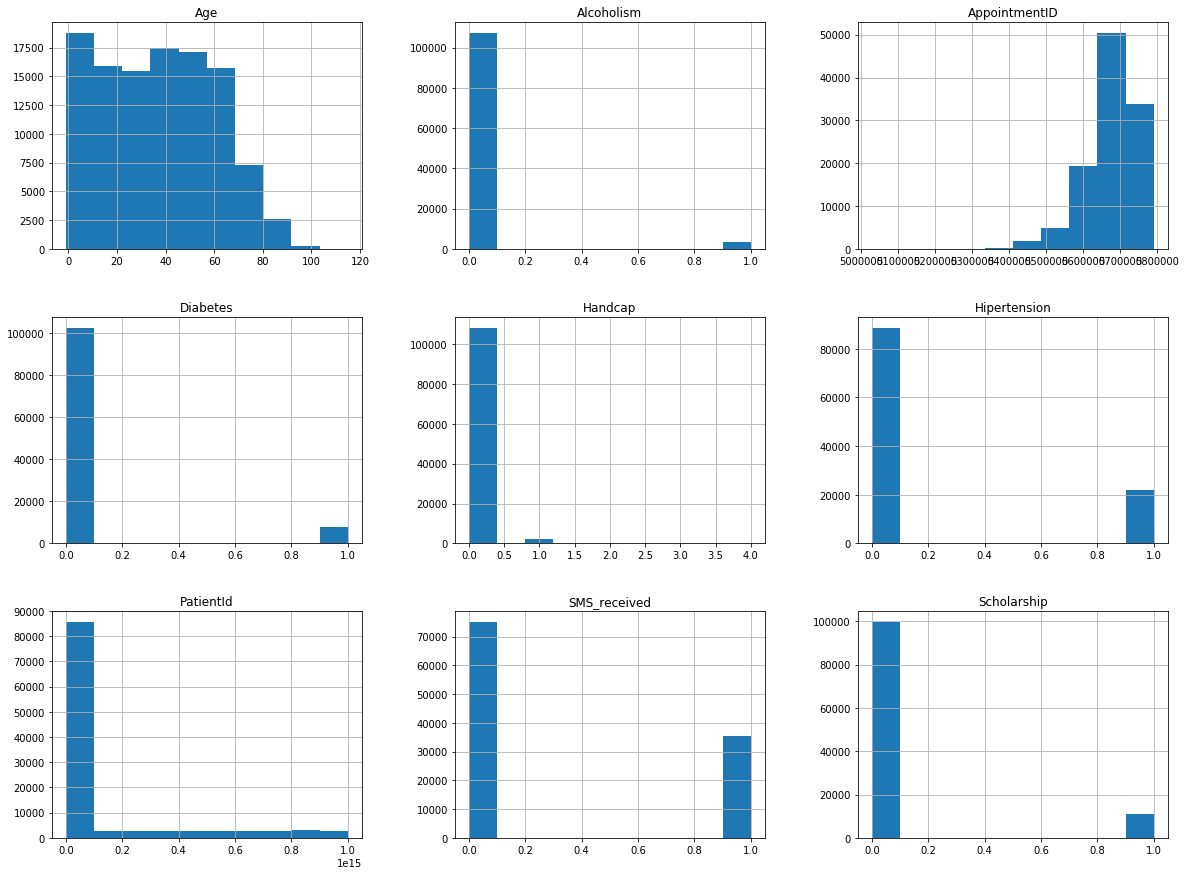

In [8]:
# Display data in histogram format.
df.hist(figsize=(20, 15));

### Data Cleaning (Repair of data type)

> Here we will modify some data properties, and correct errors as follows: -
   <li> Change the data type in the columns (scheduled day, date day) to"datetime"to make it easier to work with.
   <li> Modify the column name "No-showNo-show" To "No_show" because it is not suitable for correct handling.
   <li> Correcting errors in the age data due to the presence of negative lifetime values(-1).
   <li>Show the most important factors that will be examined(PatientId, AppointmentID, ScheduledDay, 
 AppointmentDay).


In [9]:
# Time data type adjustment.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [10]:
# Modify a column name because it is incorrect.
df = df.rename(columns={"No-show": "No_show"})

In [11]:
# correcting errors in the age data due to the presence of negative lifetime values.
df = df[df["Age"]>=0] 

In [12]:
# Show the most important factors that will be examined.
df.drop(["PatientId", "AppointmentID","ScheduledDay", "AppointmentDay"], axis=1, inplace=True)
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# Ensure that adjustments are made.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110526 non-null object
Age              110526 non-null int64
Neighbourhood    110526 non-null object
Scholarship      110526 non-null int64
Hipertension     110526 non-null int64
Diabetes         110526 non-null int64
Alcoholism       110526 non-null int64
Handcap          110526 non-null int64
SMS_received     110526 non-null int64
No_show          110526 non-null object
dtypes: int64(7), object(3)
memory usage: 9.3+ MB


In [14]:
# Ensure that adjustments are made.
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


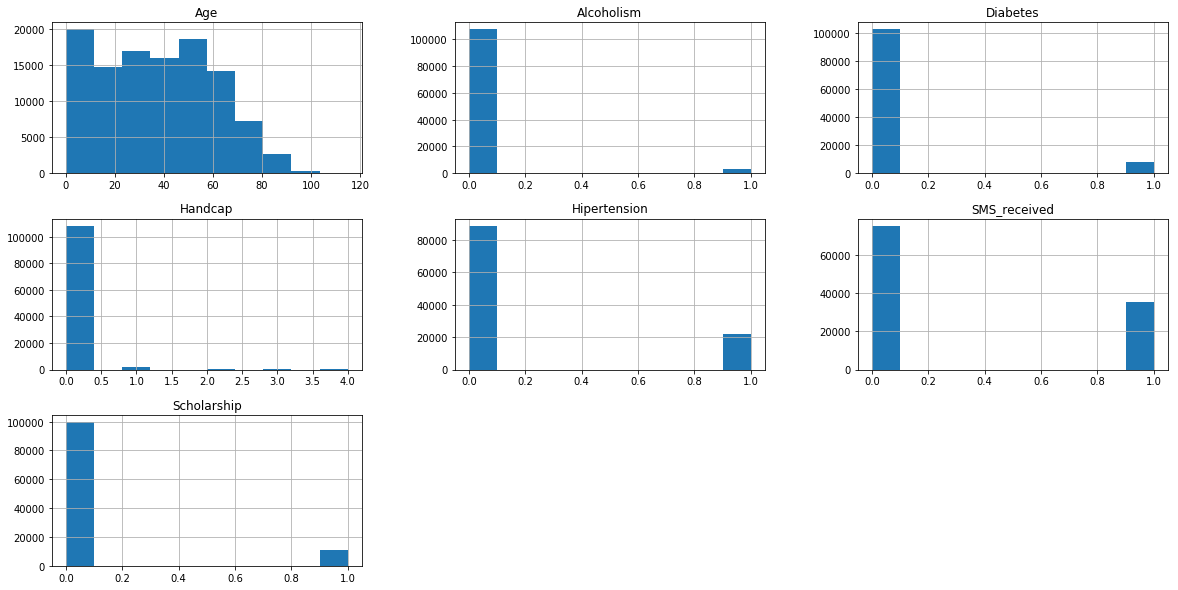

In [15]:
#Ensure that adjustments are made.
df.hist(figsize=(20,10));

<a id='eda'></a>
## Exploratory Data Analysis

> Exploratory data analysis
Here we will explore data, calculate statistics and create visualizations in order to address the research questions I asked in the Introduction section.

## Research Question 

In [16]:
# The basic function in making graphs and statistics.
def myBarPercent(df, xVar, fig):
    
    g = df.groupby("No_show")[xVar].value_counts(normalize=True).unstack("No_show").plot.bar(rot=0, figsize=fig)
    
    for p in g.patches:
        g.annotate(f'{str(round(p.get_height()*100, 2))}%', (p.get_x()+ 0.5*(p.get_width()), p.get_height()), 
            ha="center", va="bottom", 
            fontsize=14, weight="bold") # Display values on a graph.
    
    plt.title(f'Percentage Show/No Show for {xVar}'.title(), fontsize=14, weight="bold") # title.
    plt.xlabel(xVar.title())  # x title.
    plt.ylabel("percantage")  # y title.



<a id='1'></a>
### Research Question 1 : Does 'Gender' affect attendance?

In [17]:
# Display attendance and no-show numbers by gender.
df.groupby("No_show")["Gender"].value_counts()

No_show  Gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
Name: Gender, dtype: int64

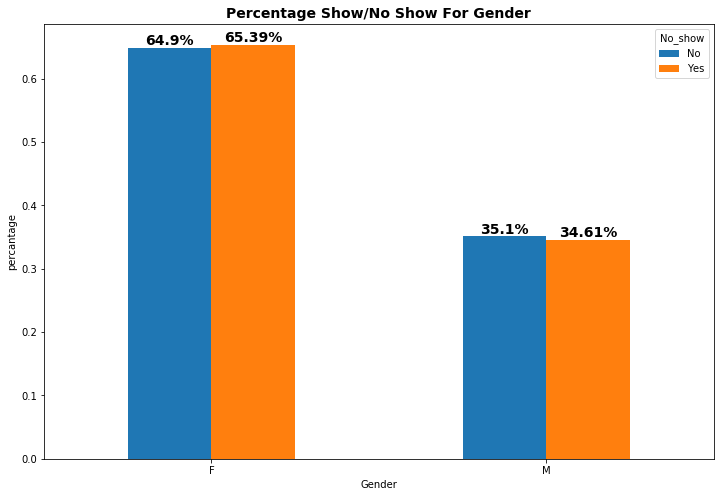

In [18]:
# Display a graph of attendance and no-show ratios by gender.
myBarPercent(df,"Gender", (12, 8))

#### From the information above, it becomes clear that ''Gender ' has no apparent impact on attendance.

<a id='2'></a>
### Research Question 2 : Does 'Scholarship' affect attendance?

In [19]:
# Display attendance and no-show numbers by Scholarship.
df.groupby("No_show")["Scholarship"].value_counts()

No_show  Scholarship
No       0              79924
         1               8283
Yes      0              19741
         1               2578
Name: Scholarship, dtype: int64

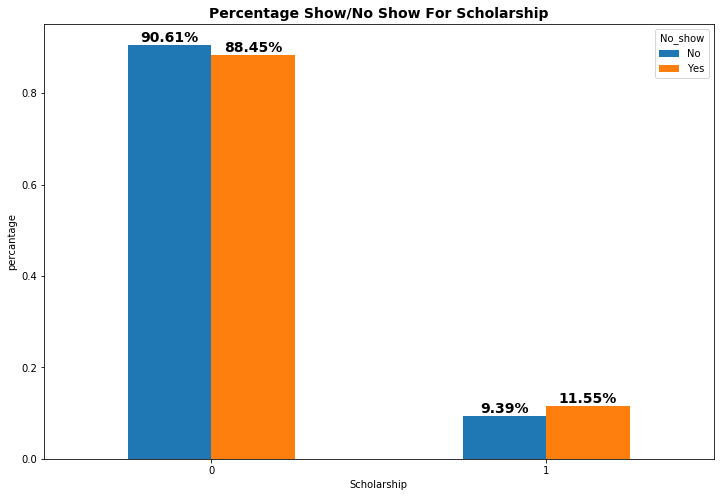

In [20]:
# Display a graph of attendance and no-show ratios by Scholarship. 
myBarPercent(df,"Scholarship", (12, 8))

#### From the information above, it becomes clear that ' Scholarship' has impact on attendance.

<a id='3'></a>
### Research Question 3 : Does 'Hipertension' affect attendance?

In [21]:
# Display attendance and no-show numbers by Hipertension.
df.groupby("No_show")["Hipertension"].value_counts()

No_show  Hipertension
No       0               70178
         1               18029
Yes      0               18547
         1                3772
Name: Hipertension, dtype: int64

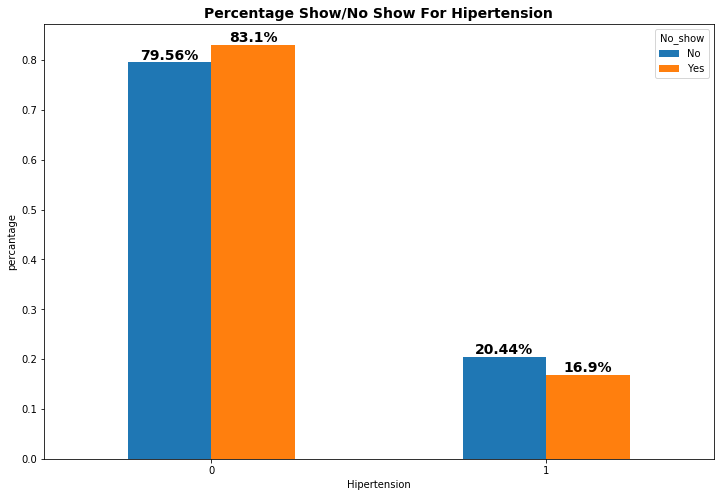

In [22]:
# Display a graph of attendance and no-show ratios by Hipertension.
myBarPercent(df,"Hipertension", (12, 8))

#### From the information above, it becomes clear that 'Hipertension ' has apparent impact on attendance.

<a id='4'></a>
### Research Question 4 : Does 'Diabetes' affect attendance?

In [23]:
# Display attendance and no-show numbers by Diabetes.
df.groupby("No_show")["Diabetes"].value_counts()

No_show  Diabetes
No       0           81694
         1            6513
Yes      0           20889
         1            1430
Name: Diabetes, dtype: int64

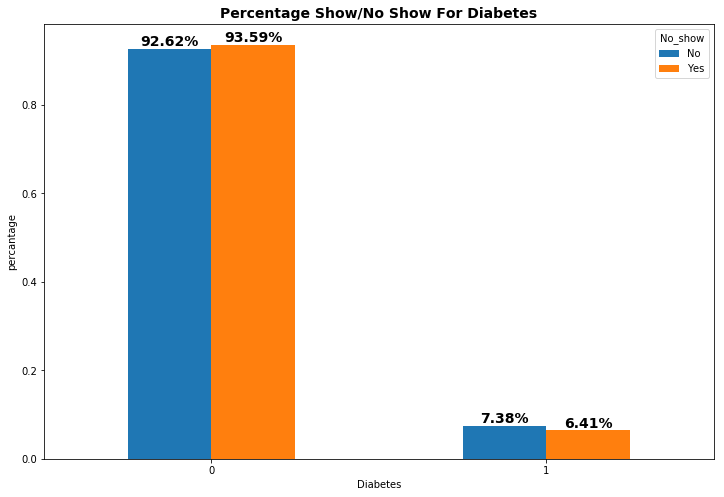

In [24]:
# Display a graph of attendance and no-show ratios by Diabetes.
myBarPercent(df,"Diabetes", (12,8))

#### From the information above, it becomes clear that ' Diabetes' has no apparent impact on attendance.

<a id='5'></a>
### Research Question 5 : Does 'Alcoholism' affect attendance?

In [25]:
# Display attendance and no-show numbers by Alcoholism.
df.groupby("No_show")["Alcoholism"].value_counts()

No_show  Alcoholism
No       0             85524
         1              2683
Yes      0             21642
         1               677
Name: Alcoholism, dtype: int64

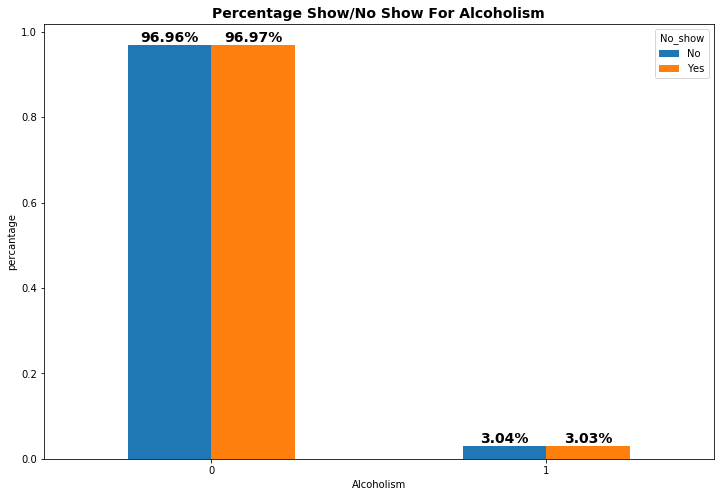

In [26]:
# Display a graph of attendance and no-show ratios by Alcoholism.
myBarPercent(df,"Alcoholism",(12, 8))

#### From the information above, it becomes clear that ' Alcoholism' has no apparent impact on attendance.

<a id='6'></a>
### Research Question 6 : Does 'Handicap' affect attendance?

In [27]:
# Display attendance and no-show numbers by Handcap.
df.groupby("No_show")["Handcap"].value_counts()

No_show  Handcap
No       0          86373
         1           1676
         2            146
         3             10
         4              2
Yes      0          21912
         1            366
         2             37
         3              3
         4              1
Name: Handcap, dtype: int64

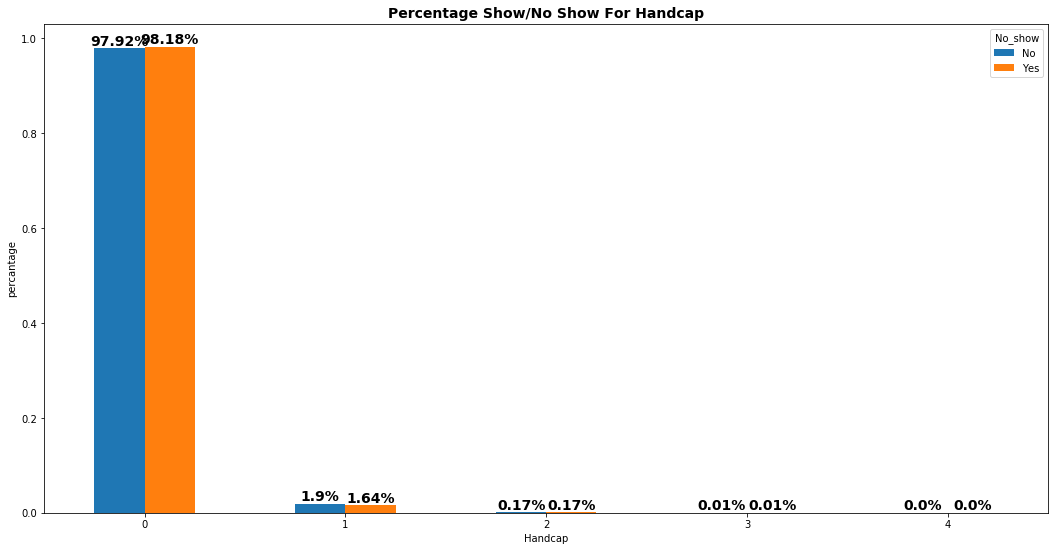

In [28]:
# Display a graph of attendance and no-show ratios by Handcap.
myBarPercent(df,"Handcap", (18, 9))

#### From the information above, it becomes clear that ' Handcap' has no apparent impact on attendance.

<a id='7'></a>
### Research Question 7 : Does 'SMS_received' affect attendance?

In [29]:
# Display attendance and no-show numbers by SMS_received.
df.groupby("No_show")["SMS_received"].value_counts()

No_show  SMS_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
Name: SMS_received, dtype: int64

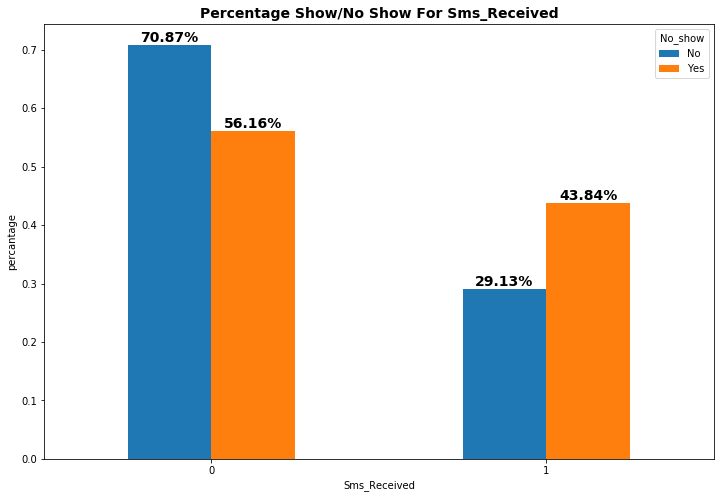

In [30]:
# Display a graph of attendance and no-show ratios by SMS_received.
myBarPercent(df,"SMS_received",(12, 8))

#### From the information above, it becomes clear that 'SMS_received ' has impact on attendance.

<a id='8'></a>
### Research Question 8 : Does 'Age' affect attendance?

In [31]:
# Display attendance and no-show numbers by Age.
df.groupby("No_show")["Age"].value_counts()

No_show  Age
No       0      2900
         1      1858
         52     1449
         56     1372
         2      1366
         59     1357
         49     1354
         53     1332
         57     1325
         50     1322
         38     1309
         51     1284
         54     1262
         3      1236
         36     1236
         37     1216
         58     1216
         6      1205
         34     1204
         45     1198
         39     1196
         63     1195
         46     1177
         33     1176
         60     1175
         32     1174
         5      1169
         55     1168
         44     1164
         30     1152
                ... 
Yes      69      118
         72      101
         73       96
         70       94
         76       91
         74       89
         78       89
         75       81
         80       81
         77       79
         82       66
         81       63
         79       61
         83       61
         85       49
         86       42


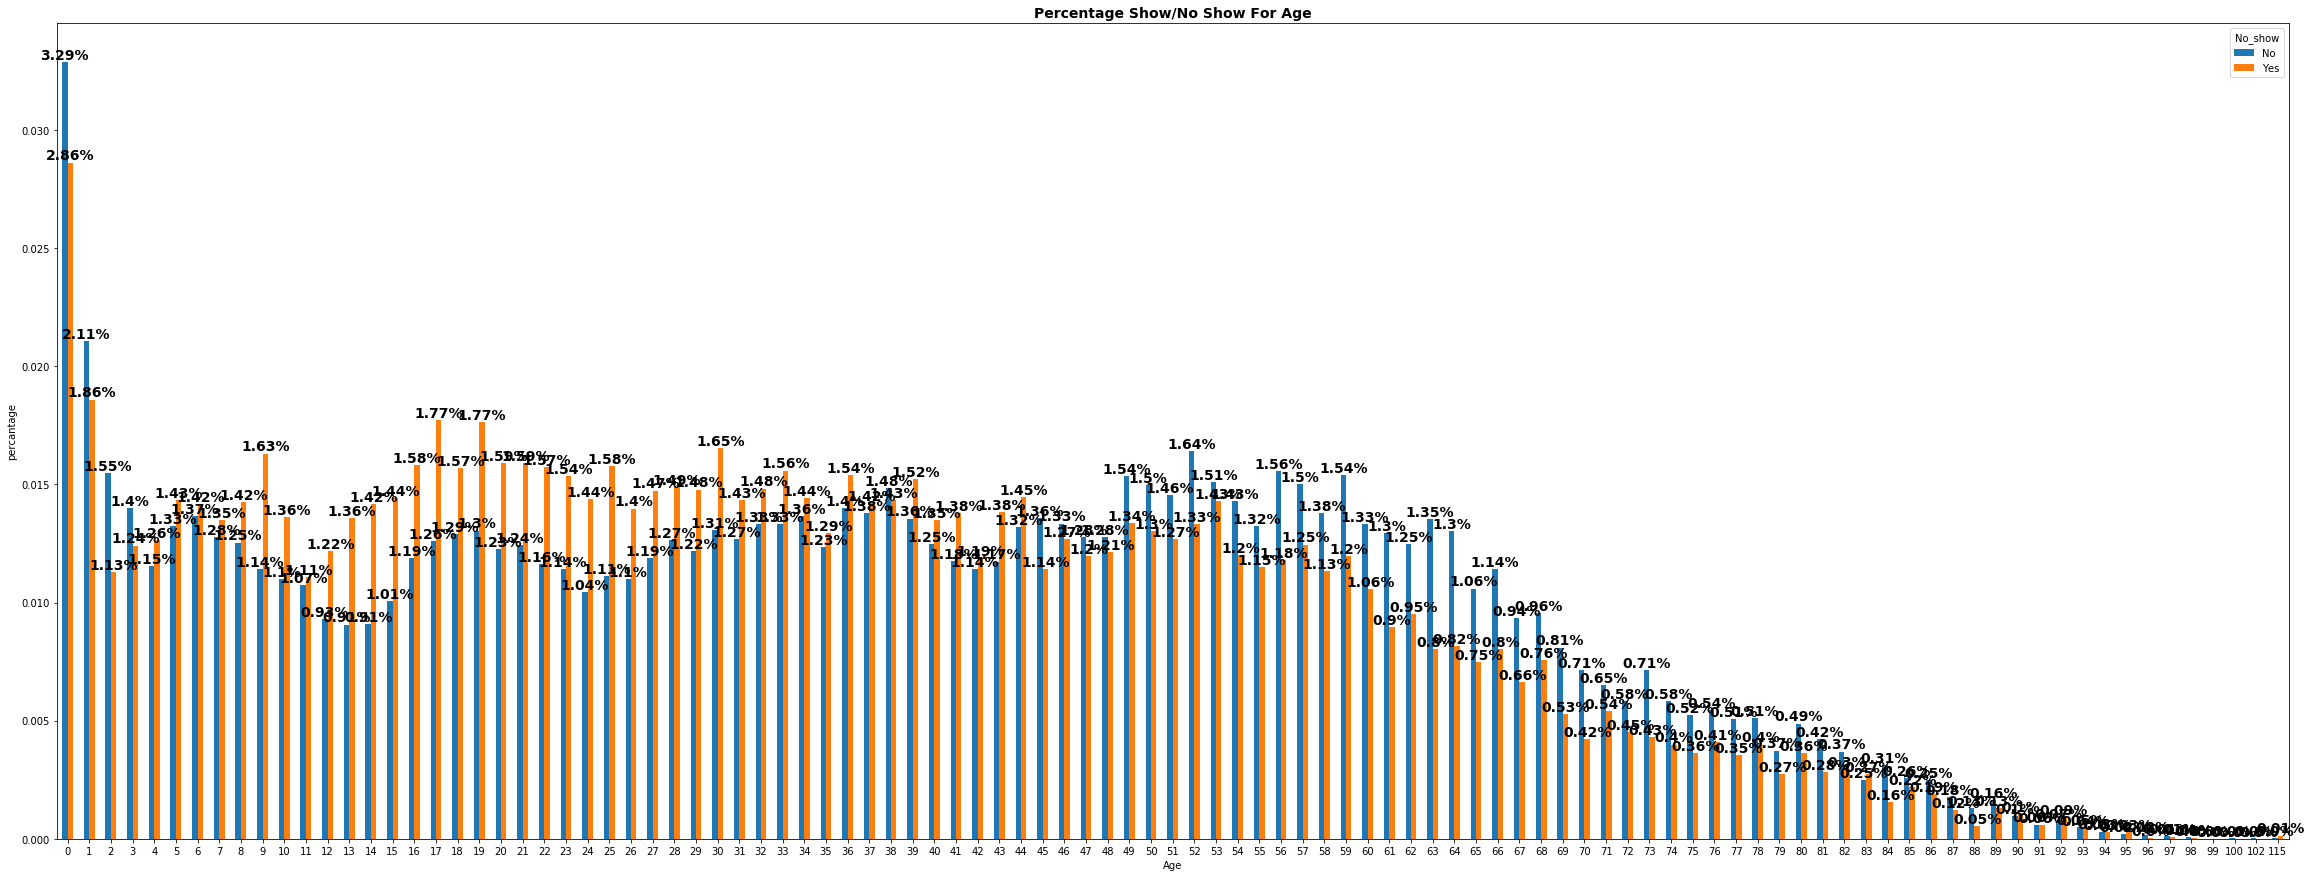

In [32]:
# Display a graph of attendance and no-show ratios by Age.
myBarPercent(df,"Age",(40, 15))

#### From the information above, it becomes clear that ' Age' has  impact on attendance.

<a id='9'></a>
### Research Question 9 : Are there anomalies in age, what is the average age of patients ?

In [33]:
# Display statistical information about age data according to attendance and no-show.
df.groupby("No_show")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
No_show,,,,,,,,
No,88207.0,37.790504,23.338645,0.0,18.0,38.0,56.0,115.0
Yes,22319.0,34.317667,21.965941,0.0,16.0,33.0,51.0,115.0


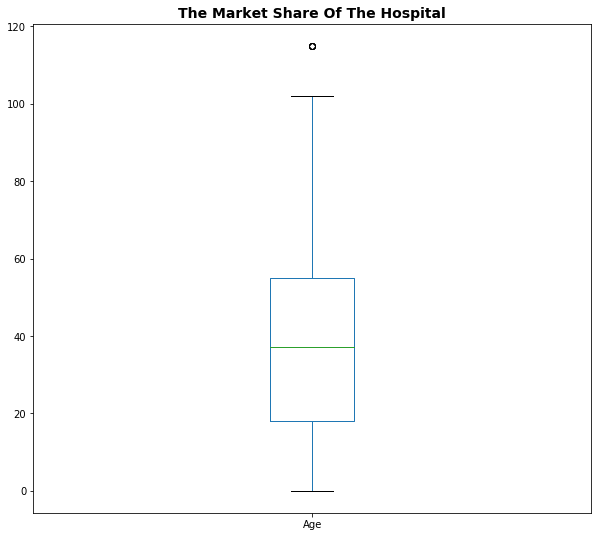

In [34]:
# Display a graph showing statistical information on age data.
df["Age"].plot.box(rot=0, figsize=(10, 9));
plt.title("The market share of the hospital".title(), fontsize=14, weight="bold");

#### It is clear from the above information that the average age of patients is (37), and that there are anomalous values for age (115).

<a id='10'></a>
### Research Question 10 : Which hospitals have the highest attendance rate and which are the least?

In [35]:
# Display the attendance and no-show numbers in each hospital separately.
df.groupby("Neighbourhood")["No_show"].value_counts().unstack("No_show")

No_show,No,Yes
Neighbourhood,,
AEROPORTO,7.0,1.0
ANDORINHAS,1741.0,521.0
ANTONIO HON?RIO,221.0,50.0
ARIOVALDO FAVALESSA,220.0,62.0
BARRO VERMELHO,332.0,91.0
BELA VISTA,1523.0,384.0
BENTO FERREIRA,665.0,193.0
BOA VISTA,254.0,58.0
BONFIM,2223.0,550.0


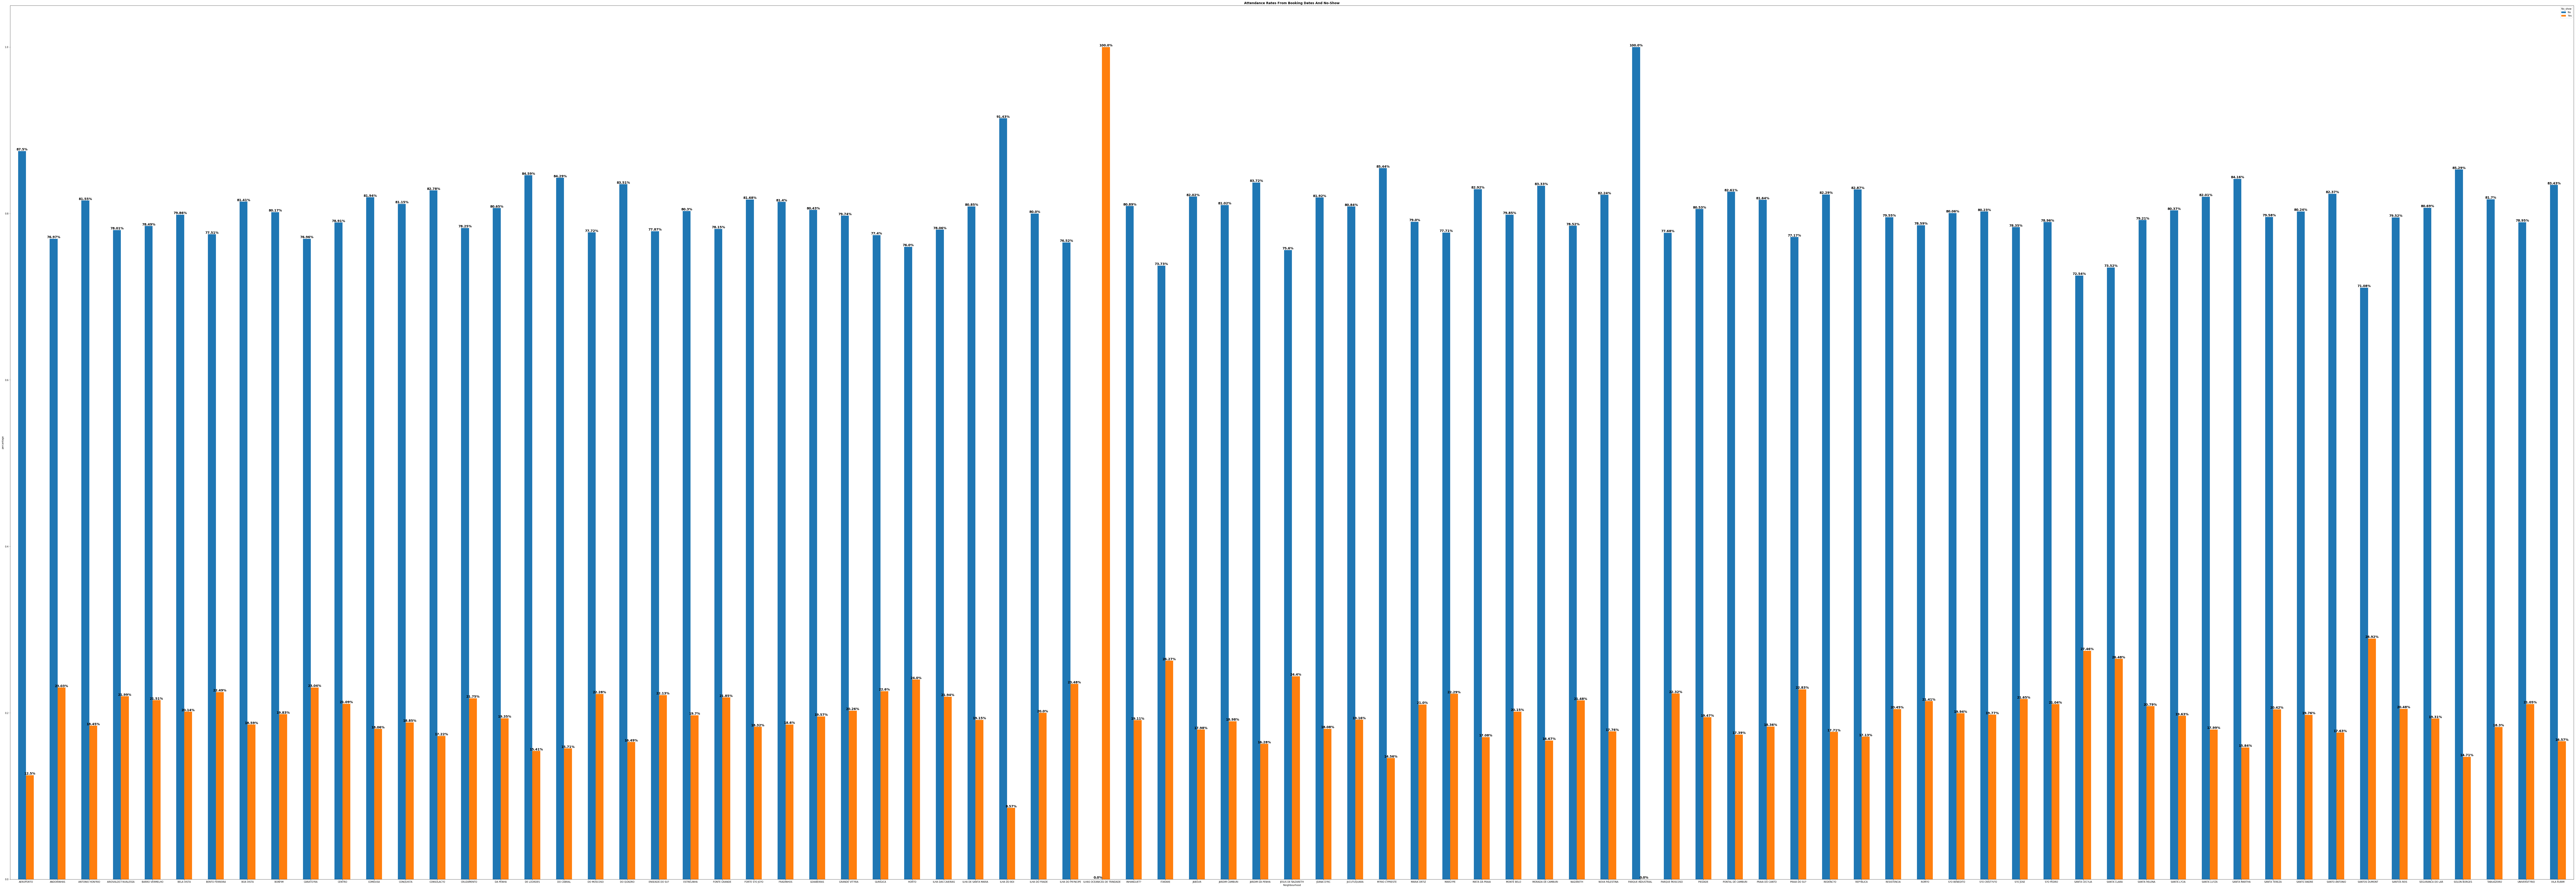

In [36]:
# Function to display a graph of attendance and no-show rates in each hospital separately.
dgd = df.groupby("Neighbourhood")["No_show"].value_counts(normalize=True).unstack("No_show").plot.bar(rot=0, figsize=(200, 70))

for p in dgd.patches:
    dgd.annotate(f'{str(round(p.get_height()*100, 2))}%', (p.get_x()+ 0.5*(p.get_width()), p.get_height()), 
               ha="center", va="bottom", 
               fontsize=14, weight="bold");  # Display values on a graph.
    
plt.title("Attendance rates from booking dates and no-show".title(), fontsize=14, weight="bold");   # title
plt.xlabel("Neighbourhood");  # x title
plt.ylabel("percantage");    # y title


#### From the information above, it becomes clear that 'Neighbourhood ' has impact on attendance.

<a id='11'></a>
### Research Question 11 : "Which hospitals have the largest number of clients and which ones are the fewest?"

In [37]:
# Display the number of clients in each hospital separately.
df["Neighbourhood"].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTENCIA                    4431
JARDIM DA PENHA                3877
ITARARE                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTONIO                  2746
SANTO ANDRE                    2571
CARATO?RA                      2565
JABOUR                         2509
S?O PEDRO                      2448
ILHA DO PR?NCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROM?O                          2214
GURIGICA                       2018
S?O JOSE                       1977
BELA VISTA                     1907
MARU?PE                        1902
FORTE S?O JO?O                 1889
ILHA DE SANTA MARIA            1885
S?O CRIST?V?O                  1836
REDENC?O                    

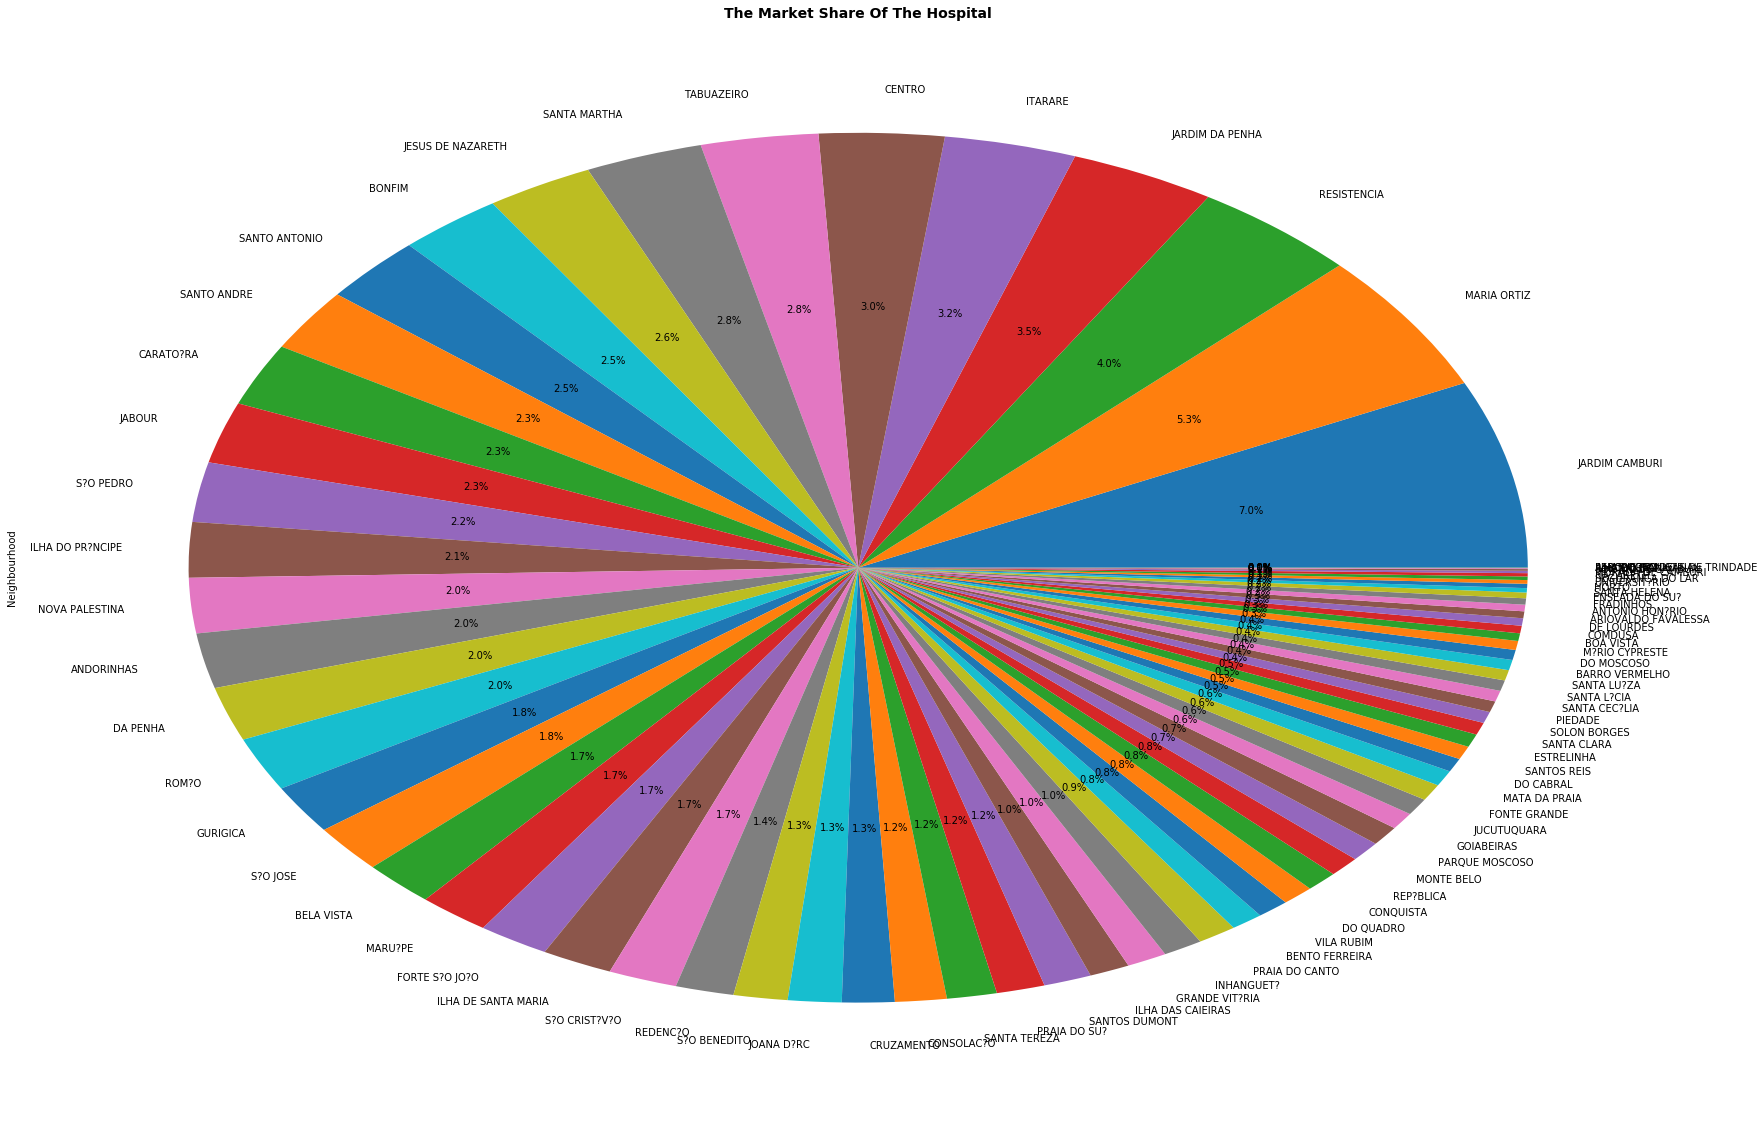

In [39]:
# Function to display a graph of the percentage of each hospital in the market.
dg = df["Neighbourhood"].value_counts(normalize=True)*100
dg.plot.pie(rot=0, figsize=(30, 20), autopct='%1.1f%%');

plt.title("The market share of the hospital".title(), fontsize=14, weight="bold"); # title.

#### It is evident from the above information that the hospital in the neighborhood `JARDIM CAMBURI` has the highest percentage of the market (7%).

<a id='conclusions'></a>
## Conclusions

> From the information above, it becomes clear that '(Gender ,Diabetes, Alcoholism, Handcap, )has no apparent impact on attendance.

> From the information above, it becomes clear that (Hipertension , Scholarship, SMS received, Age, Neighbourhood of hosptal )has impact on attendance.

> It is clear from the above information that the average age of patients is (37), and that there are anomalous values for age (115), And that there is a difference between the average age of those who attended (38) and the average age of those who did not attend (33).

>It is evident from the above information that the hospital in the neighborhood JARDIM CAMBURI has the highest percentage of the market (7%).

## Submitting your Project 

> Lack of sufficient information about the hospital, such as reputation, advertising budget, quality of service, and other factors that could affect patients ’decision to continue dealing with this hospital.

> The sample size of the data is good, but it is not proportional to the size of the community and insufficient to extract high quality information.

> Not mentioning the patient’s social level, although it is a factor that affects frequency to the doctor.

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0